In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB

In [ ]:
data=pd.read_csv('/content/tested.csv')
data.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,0,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,0,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
5,897,0,3,"Svensson, Mr. Johan Cervin",male,14.0,0,0,7538,9.2250,NaN,S
6,898,1,3,"Connolly, Miss. Kate",female,30.0,0,0,330972,7.6292,NaN,Q
7,899,0,2,"Caldwell, Mr. Albert Francis",male,26.0,1,1,248738,29.0000,NaN,S
8,900,1,3,"Abrahim, Mrs. Joseph (Sophie Halaut Easu)",female,18.0,0,0,2657,7.2292,NaN,C
9,901,0,3,"Davies, Mr. John Samuel",male,21.0,2,0,A/4 48871,24.1500,NaN,S


**UNDERSTANDING THE DATA**

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 417 entries, 0 to 416
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  417 non-null    int64  
 1   Survived     417 non-null    int64  
 2   Pclass       417 non-null    int64  
 3   Name         417 non-null    object 
 4   Sex          417 non-null    object 
 5   Age          331 non-null    float64
 6   SibSp        417 non-null    int64  
 7   Parch        417 non-null    int64  
 8   Ticket       417 non-null    object 
 9   Fare         417 non-null    float64
 10  Cabin        91 non-null     object 
 11  Embarked     417 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 39.2+ KB


In [ ]:
data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          326
Embarked         0
dtype: int64

**DATA ANALYSIS**

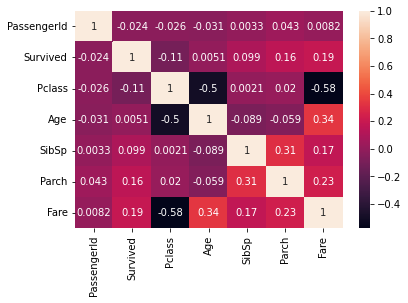

In [ ]:
corr_matrix=data.corr()
features=corr_matrix.index
sns.heatmap(data[features].corr(),annot=True)

From the correleation matrix it is clear that Fare is the most significant parameter when it comes to classifying who survived and PassengerId and Pclass are the least significant

In [ ]:
data['SibSp'].unique()


array([0, 1, 2, 3, 4, 5, 8])

/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:3717: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:3723: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


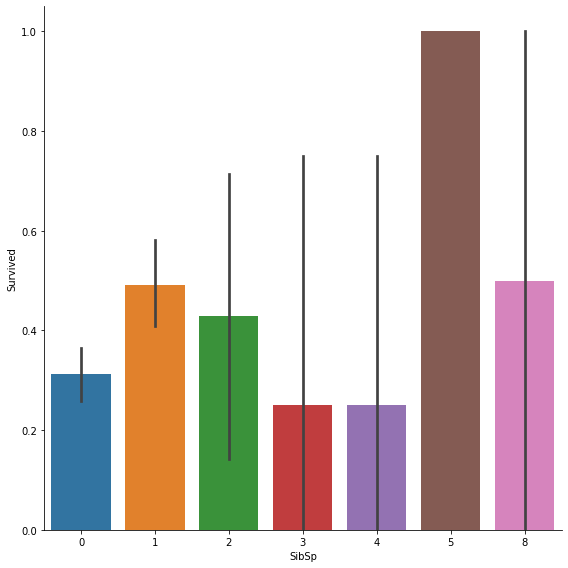

In [ ]:
bargraph_sibsp=sns.factorplot(x='SibSp',y='Survived',data=data,kind='bar',size=8)

From the graph it is clear that passengers with more siblings/spouses are likely to survive than passengers with less no of siblings/spouses

/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:337: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


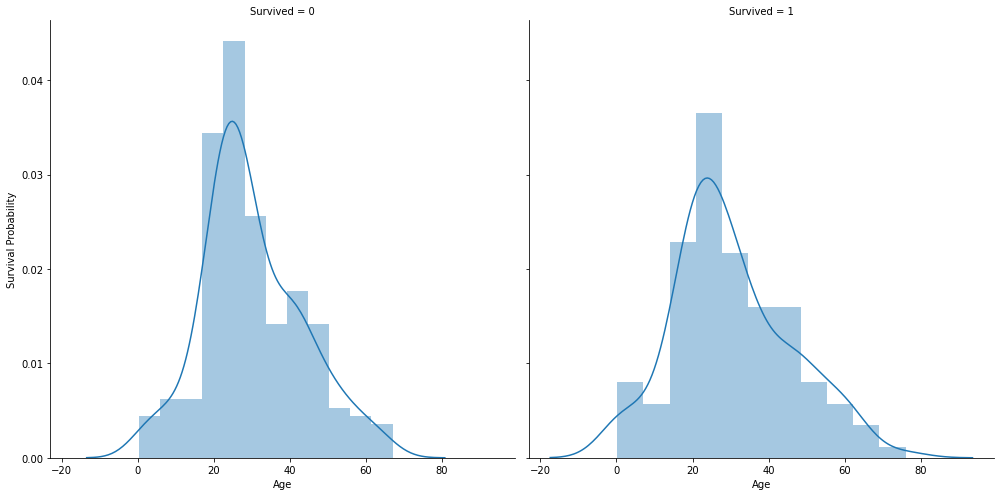

In [ ]:
age_visual=sns.FacetGrid(data,col="Survived",size=7)
age_visual=age_visual.map(sns.distplot,"Age")
age_visual=age_visual.set_ylabels("Survival Probability")


If you are between 20 to 40 you most likely to survive.

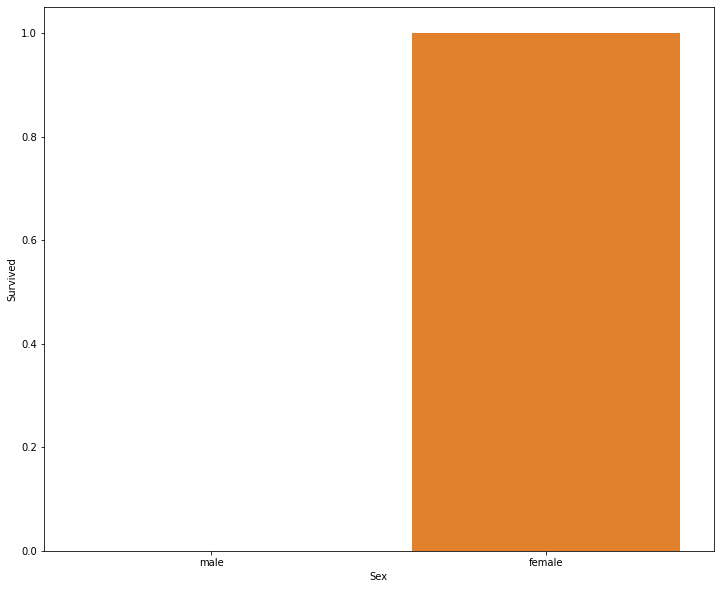

In [ ]:
plt.figure(figsize=[12,10])
sns.barplot(x="Sex",y="Survived",data=data)

In [ ]:
data[['Sex','Survived']].groupby('Sex').mean()

,Survived
Sex,
female,1
male,0


From this graph it is clear the females have a higher chance of survival

/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:3717: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:3723: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


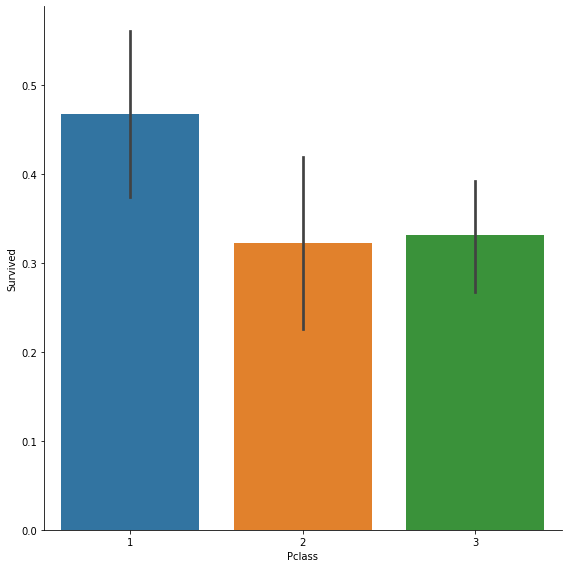

In [ ]:
sns.factorplot(x='Pclass',y='Survived',data=data,kind='bar',size=8)

From this graph it is clear that higher the class higher the chance of survival

/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:3717: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:3723: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


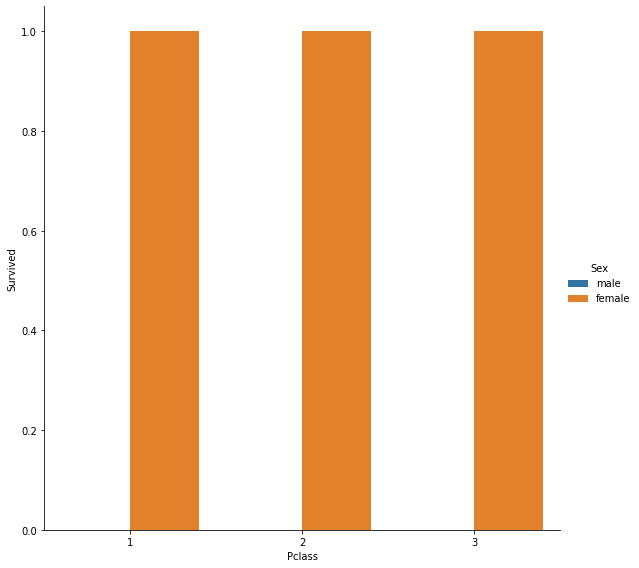

In [ ]:
sns.factorplot(x='Pclass',y='Survived',hue='Sex',data=data,kind='bar',size=8)

From this graph it is clear that women from all the classes survive.

In [ ]:
data['Embarked'].isnull().sum()

0

In [ ]:
print(data['Embarked'].unique())
print(data['Embarked'].value_counts())

['Q' 'S' 'C']
S    269
C    102
Q     46
Name: Embarked, dtype: int64


/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:3717: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:3723: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


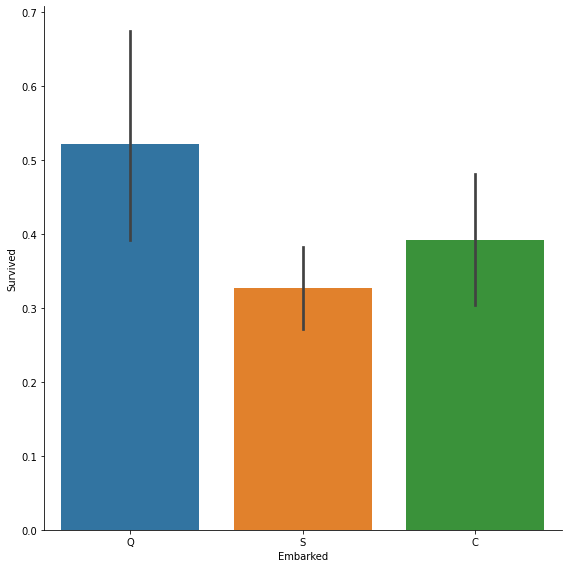

In [ ]:
sns.factorplot(x='Embarked',y='Survived',data=data,kind='bar',size=8)

/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:3717: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:3723: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


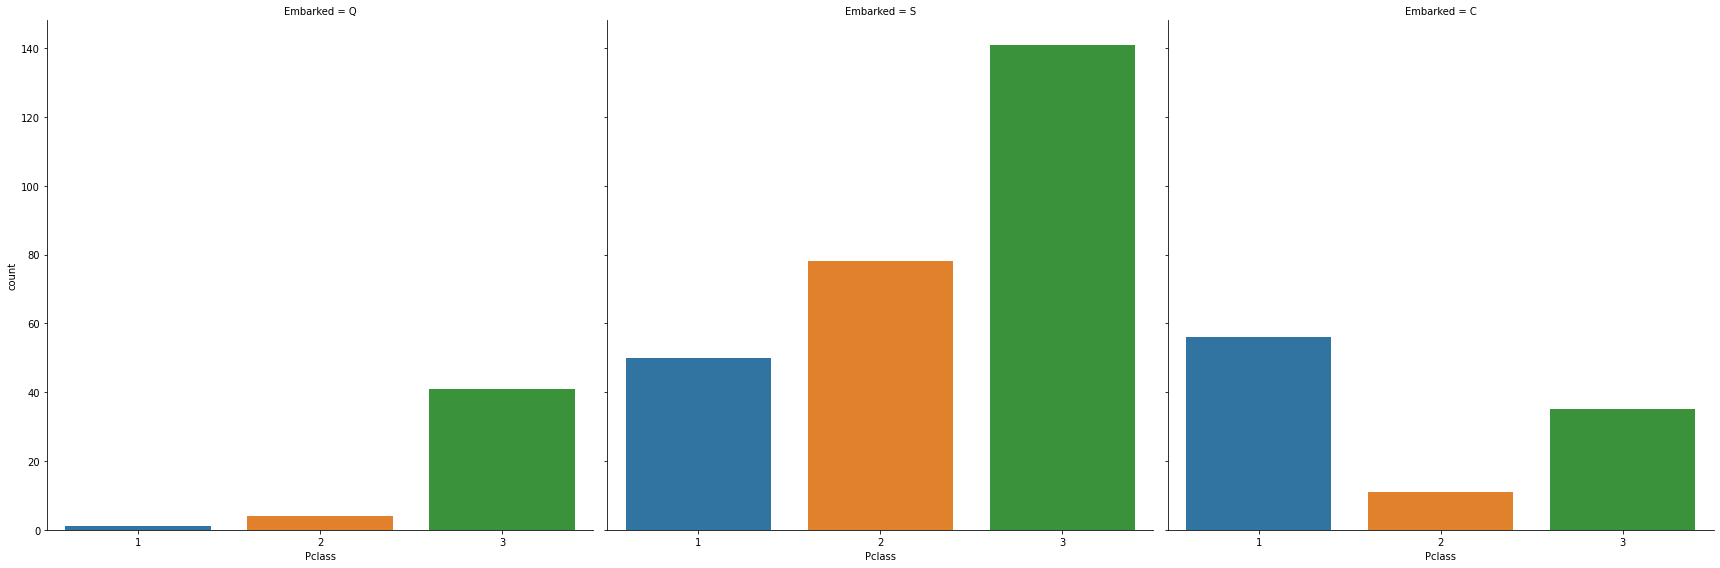

In [ ]:
sns.factorplot('Pclass',col='Embarked',data=data,kind='count',size=8)

Passengers coming from station Q is most likely to survive than others.

DATA PREPARATION

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 417 entries, 0 to 416
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  417 non-null    int64  
 1   Survived     417 non-null    int64  
 2   Pclass       417 non-null    int64  
 3   Name         417 non-null    object 
 4   Sex          417 non-null    object 
 5   Age          331 non-null    float64
 6   SibSp        417 non-null    int64  
 7   Parch        417 non-null    int64  
 8   Ticket       417 non-null    object 
 9   Fare         417 non-null    float64
 10  Cabin        91 non-null     object 
 11  Embarked     417 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 39.2+ KB


In [ ]:
data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          326
Embarked         0
dtype: int64

In [ ]:
mean=data['Age'].mean()
std=data['Age'].std()
print(mean)
print(std)

30.181268882175228
14.104572594801612


In [ ]:
#from sklearn.impute import SimpleImputer
#imputed_data=imputer_mean.fit_transform(data[['Age']])
#imputed_data=pd.DataFrame(data=imputed_data,columns=['Age'])
#imputed_data

In [ ]:
#data['Age']=imputed_data
#data['Age'].isnull().sum()

In [ ]:
rand_age=np.random.randint(mean-std,mean+std,size=86)
age_slice=data['Age'].copy()
age_slice[np.isnan(age_slice)]=rand_age
data['Age']=age_slice

In [ ]:
data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          326
Embarked         0
dtype: int64

In [ ]:
data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          326
Embarked         0
dtype: int64

In [ ]:
data=data.drop(["PassengerId","Cabin","Name","Ticket"],axis=1)

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 417 entries, 0 to 416
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  417 non-null    int64  
 1   Pclass    417 non-null    int64  
 2   Sex       417 non-null    object 
 3   Age       417 non-null    float64
 4   SibSp     417 non-null    int64  
 5   Parch     417 non-null    int64  
 6   Fare      417 non-null    float64
 7   Embarked  417 non-null    object 
dtypes: float64(2), int64(4), object(2)
memory usage: 26.2+ KB


In [ ]:
genders={"male":0,"female":1}
data['Sex']=data['Sex'].map(genders)

In [ ]:
ports={"S":0,"C":1,"Q":1}
data['Embarked']=data['Embarked'].map(ports)

In [ ]:
data.head(10)

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,0,34.5,0,0,7.8292,1
1,1,3,1,47.0,1,0,7.0000,0
2,0,2,0,62.0,0,0,9.6875,1
3,0,3,0,27.0,0,0,8.6625,0
4,1,3,1,22.0,1,1,12.2875,0
5,0,3,0,14.0,0,0,9.2250,0
6,1,3,1,30.0,0,0,7.6292,1
7,0,2,0,26.0,1,1,29.0000,0
8,1,3,1,18.0,0,0,7.2292,1
9,0,3,0,21.0,2,0,24.1500,0


In [ ]:
X=data.iloc[:,1:]
Y=data.iloc[:,0]

In [ ]:
X


,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,0,34.5,0,0,7.8292,1
1,3,1,47.0,1,0,7.0000,0
2,2,0,62.0,0,0,9.6875,1
3,3,0,27.0,0,0,8.6625,0
4,3,1,22.0,1,1,12.2875,0
...,...,...,...,...,...,...,...
412,3,0,16.0,0,0,8.0500,0
413,1,1,39.0,0,0,108.9000,1
414,3,0,38.5,0,0,7.2500,0
415,3,0,38.0,0,0,8.0500,0


In [ ]:
Y

0      0
1      1
2      0
3      0
4      1
      ..
412    0
413    1
414    0
415    0
416    0
Name: Survived, Length: 417, dtype: int64

In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.4)

In [ ]:
from sklearn.preprocessing import StandardScaler
sc_x=StandardScaler()
X_train=sc_x.fit_transform(X_train)
X_test=sc_x.transform(X_test)

In [ ]:
data.isnull().sum()

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64

CLASSIFICATION

In [ ]:
model1=SVC(kernel='linear')
model2=DecisionTreeClassifier(criterion="entropy")
model3=RandomForestClassifier(n_estimators=100,criterion="entropy")
model4=GaussianNB()

In [ ]:
model1.fit(X_train,Y_train)
model2.fit(X_train,Y_train)
model3.fit(X_train,Y_train)
model4.fit(X_train,Y_train)

GaussianNB()

In [ ]:
pred1=model1.predict(X_test)
pred2=model2.predict(X_test)
pred3=model3.predict(X_test)
pred4=model4.predict(X_test)

In [ ]:
from sklearn.metrics import accuracy_score
print("Accuracy Score of SVC Classifer",accuracy_score(Y_test,pred1)*100)
print("Accuracy Score of Decision Tree Classifer",accuracy_score(Y_test,pred2)*100)
print("Accuracy Score of Random Forest Classifer",accuracy_score(Y_test,pred3)*100)
print("Accuracy Score of Naive Bayes Classifer",accuracy_score(Y_test,pred4)*100)

Accuracy Score of SVC Classifer 100.0
Accuracy Score of Decision Tree Classifer 100.0
Accuracy Score of Random Forest Classifer 100.0
Accuracy Score of Naive Bayes Classifer 100.0
